# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "C:/AV/Carla/CARLA_0.9.13/WindowsNoEditor/PythonAPI/experiments/logs"


In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\TTI-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter1d

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
date = "2023-09-11-00-00"
fps=25
minYDisplacement = 5
maxXDisplacement = 9
df = pd.read_csv(os.path.join(dataDir, f"{date}-tracks.csv"))
df["uniqueTrackId"] = df["recordingId"] * 1000000 + df["trackId"]
pedDf = df[df["class"] == "pedestrian"].copy()
otherDf = df[df["class"] != "pedestrian"].copy()
print(pedDf.head())

    recordingId  trackId       class  frame          x          y    heading  \
51            1      413  pedestrian    100 -82.733887  24.431015 -24.760538   
52            1      413  pedestrian    101 -82.735428  24.428408 -39.160503   
53            1      413  pedestrian    102 -82.732635  24.425043 -24.760445   
54            1      413  pedestrian    103 -82.734093  24.422201 -39.160408   
55            1      413  pedestrian    104 -82.731201  24.418684 -24.760384   

       state  uniqueTrackId  
51  CROSSING        1000413  
52  CROSSING        1000413  
53  CROSSING        1000413  
54  CROSSING        1000413  
55  CROSSING        1000413  


In [6]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='x', 
        yCol='y',
        xVelCol='xVel', 
        yVelCol='yVel', 
        speedCol='speed',
        fps=fps,
    )
transformer = TrajectoryTransformer(colMapper)

In [35]:
transformer.deriveAxisVelocities(pedDf)
transformer.deriveSpeed(pedDf)
transformer.smoothenSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
# pedDf.describe()
pedDf.head()

[51     0.075719
52     0.075719
53     0.079265
54     0.080752
55     0.083509
56     0.086248
57     0.089753
58     0.093215
59     0.096998
60     0.100702
61     0.105095
62     0.109641
63     0.114669
64     0.120039
65     0.125409
66     0.130811
67     0.136295
68     0.142387
69     0.149264
70     0.157342
71     0.166518
72     0.177336
73     0.189670
74     0.203999
75     0.219923
76     0.237407
77     0.255616
78     0.274762
79     0.294724
80     0.316487
81     0.340054
82     0.366113
83     0.394141
84     0.424417
85     0.456079
86     0.489612
87     0.524243
88     0.560581
89     0.597523
90     0.635787
91     0.672085
92     0.706558
93     0.733495
94     0.751519
95     0.756114
96     0.751052
97     0.736325
98     0.717239
99     0.692478
100    0.664956
101    0.635449
Name: speed, dtype: float64]


,recordingId,trackId,class,frame,x,y,heading,state,uniqueTrackId,xVel,yVel,speed,displacementX,displacementY,speedSmooth
51,1,413,pedestrian,100,-82.733887,24.431015,-24.760538,CROSSING,1000413,0.038528,0.065184,0.075719,0.000000,0.000000,0.075719
52,1,413,pedestrian,101,-82.735428,24.428408,-39.160503,CROSSING,1000413,0.038528,0.065184,0.075719,0.001541,0.002607,0.075719
53,1,413,pedestrian,102,-82.732635,24.425043,-24.760445,CROSSING,1000413,-0.069809,0.084114,0.109309,0.001251,0.005972,0.079265
54,1,413,pedestrian,103,-82.734093,24.422201,-39.160408,CROSSING,1000413,0.036430,0.071049,0.079844,0.000206,0.008814,0.080752
55,1,413,pedestrian,104,-82.731201,24.418684,-24.760384,CROSSING,1000413,-0.072289,0.087929,0.113829,0.002686,0.012331,0.083509


In [36]:
pedIds = pedDf["uniqueTrackId"].unique()

[51     0.076905
52     0.080949
53     0.089001
54     0.094168
55     0.097077
56     0.100186
57     0.104137
58     0.108816
59     0.113962
60     0.120092
61     0.126334
62     0.131068
63     0.135226
64     0.140816
65     0.147653
66     0.155842
67     0.164977
68     0.175145
69     0.186680
70     0.200915
71     0.217578
72     0.236866
73     0.255995
74     0.273813
75     0.292135
76     0.313284
77     0.336701
78     0.362761
79     0.391417
80     0.422695
81     0.454401
82     0.487505
83     0.521953
84     0.558681
85     0.596996
86     0.636213
87     0.673318
88     0.710768
89     0.749251
90     0.778097
91     0.774655
92     0.757949
93     0.739247
94     0.721391
95     0.700853
96     0.673763
97     0.632737
98     0.594064
99     0.572714
100    0.561101
101    0.544729
Name: speed, dtype: float64]


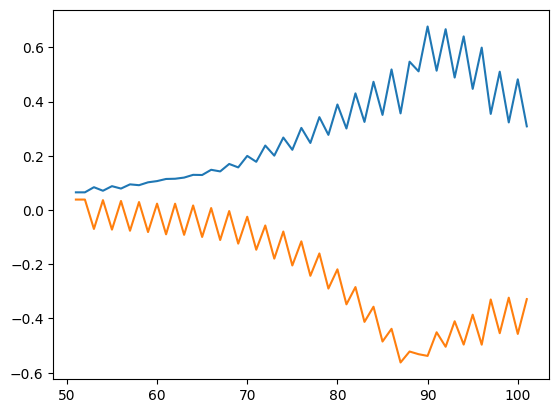

In [46]:

transformer.smoothenSpeed(pedDf)
aPed = pedDf[pedDf["uniqueTrackId"] == pedIds[0]]
plt.plot(aPed["yVel"])
plt.plot(aPed["xVel"])

<AxesSubplot: ylabel='speed'>

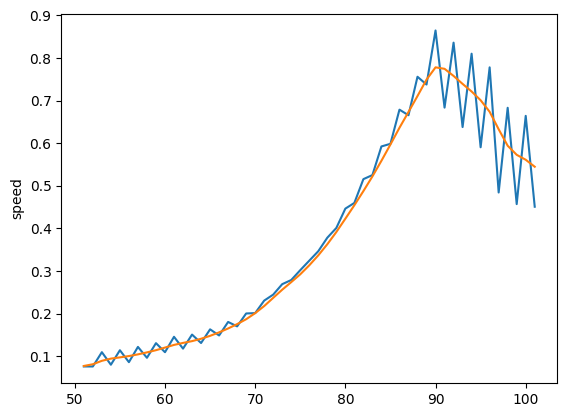

In [47]:
sns.lineplot(aPed["speed"])
sns.lineplot(aPed["speedSmooth"])

<AxesSubplot: ylabel='speed'>

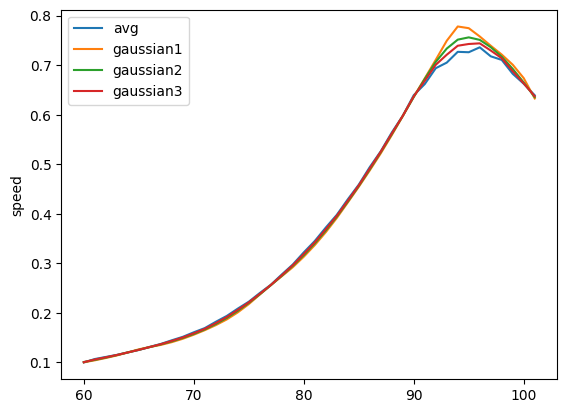

In [48]:
smoothSpeed = aPed['speed'].rolling(10).mean()
sns.lineplot(smoothSpeed, label='avg')
smoothSpeed = aPed['speed'].rolling(10, win_type='gaussian').mean(std=1)
sns.lineplot(smoothSpeed, label='gaussian1')
smoothSpeed = aPed['speed'].rolling(10, win_type='gaussian').mean(std=2)
sns.lineplot(smoothSpeed, label='gaussian2')
smoothSpeed = aPed['speed'].rolling(10, win_type='gaussian').mean(std=3)
sns.lineplot(smoothSpeed, label='gaussian3')

<AxesSubplot: ylabel='speed'>

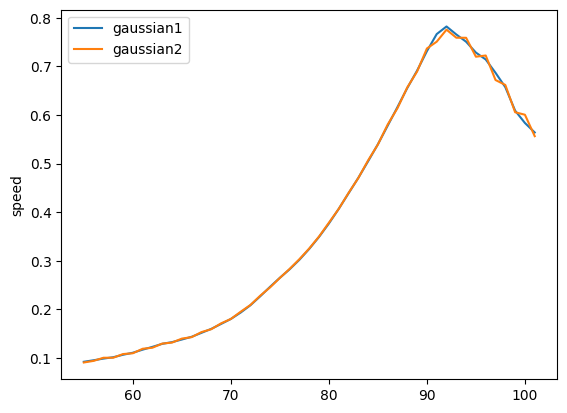

In [21]:
# smoothSpeed = aPed['speed'].rolling(5).mean()
# sns.lineplot(smoothSpeed, label='avg')
smoothSpeed = aPed['speed'].rolling(5, win_type='gaussian').mean(std=1)
sns.lineplot(smoothSpeed, label='gaussian1')
smoothSpeed = aPed['speed'].rolling(5, win_type='gaussian').mean(std=2)
sns.lineplot(smoothSpeed, label='gaussian2')
# smoothSpeed = aPed['speed'].rolling(5, win_type='gaussian').mean(std=3)
# sns.lineplot(smoothSpeed, label='gaussian3')

<AxesSubplot: ylabel='speed'>

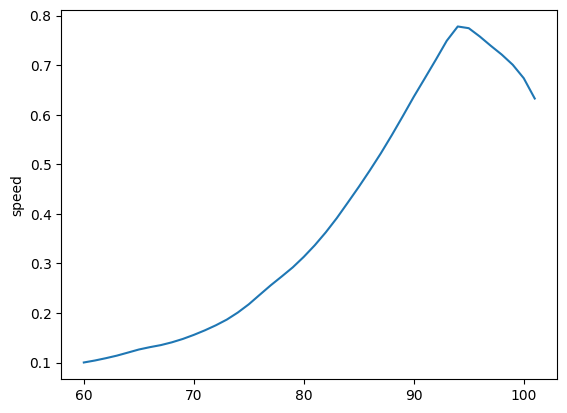

In [14]:
sns.lineplot(smoothSpeed)